Data Analytics II
1. 
Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset

2. .
Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.shape

(400, 5)

In [10]:
df.size

2000

In [14]:
df.drop(['Gender'],axis=1,inplace=True)

<Axes: >

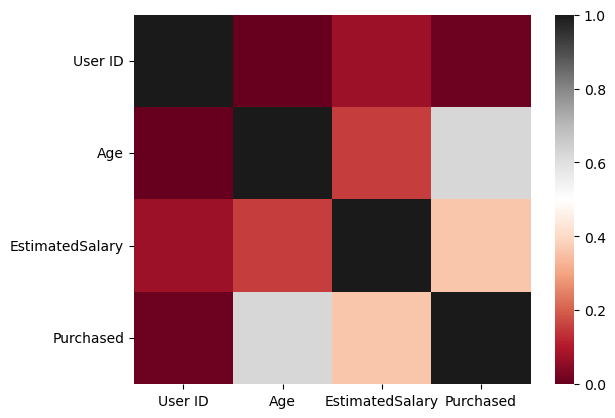

In [15]:
sns.heatmap(df.corr(),cmap="RdGy")

# Spliting Datasets  into train and test

In [17]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
print("X_train ---->",X_train.shape)
print("Y_train ---->",Y_train.shape)
print("X_test ---->",X_test.shape)
print("Y_test ---->",Y_test.shape)

X_train ----> (320, 2)
Y_train ----> (320,)
X_test ----> (80, 2)
Y_test ----> (80,)


In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [30]:
Y_predict=lr.predict(X_test)

In [32]:
lr.score(X_test,Y_predict)

1.0

# Confusion Matrix to find TP,FP,TN,FN,Accuracy,Error Rate,Precision,Recall

In [33]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predict)
CM

array([[52,  0],
       [28,  0]], dtype=int64)

In [34]:
TP,TN,FP,FN=CM.ravel()

In [35]:
(TP,TN,FP,FN)

(52, 0, 28, 0)

In [36]:
CM_data_frame=pd.DataFrame(CM,
                           columns =["Predicted  Positive","Predicted Negative"],
                           index =["Actual Positive","Actual Negative"]
)

In [37]:
CM_data_frame

,Predicted Positive,Predicted Negative
Actual Positive,52,0
Actual Negative,28,0


In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [48]:
print("Accuracy Score ----->",accuracy_score(Y_test,Y_predict))
# print("Precision Score ---->",precision_score(Y_test,Y_predict))
# print("Recall Score ------->",recall_score(Y_test,Y_predict))
# print("F-1 score----------->",f1_score(Y_test,Y_predict))
print("Error Rate---------->",1-accuracy_score(Y_test,Y_predict))
precision_score=TP/(TP+FP)
recall_score=TP/(TP+FN)
f1_score=2*(precision_score*recall_score)/(precision_score+recall_score)
print("Precision Score ----->",precision_score)
print("Recall Score -------->",recall_score)
print("F-1 Score ----------->",f1_score)

Accuracy Score -----> 0.65
Error Rate----------> 0.35
Precision Score -----> 0.65
Recall Score --------> 1.0
F-1 Score -----------> 0.787878787878788


In [46]:
print("TP------->",TP)
print("TN------->",TN)
print("FP------->",FP)
print("FN------->",FN)

TP-------> 52
TN-------> 0
FP-------> 28
FN-------> 0
